### Problem Statement

INX Future Inc., a leading data analytics and automation company, is known for its employee-friendly human resource policies, which are widely regarded as industry best practices. In the recent years there has been facing a decline in employee performance, leading to increased service delivery escalations and an 8% drop in client satisfaction levels. The management is now struggling to address performance issues without negatively impacting overall employee morale or the company’s reputation as a top employer.
To tackle this challenge, the CEO has initiated data science project, which analyses the current employee data and find the core underlying causes of this performance issues. This project aims to provide key insights, including department-wise performance analysis, the top three factors influencing employee performance, a predictive model to assess employee performance for hiring purposes, and  data-driven recommendations to enhance overall employee performance 

In [3]:
#import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import joblib

In [4]:
#load the dataset
df=pd.read_excel('C:/Users/ELITEBOOK 810/Desktop/DATA SCIENCE/EXAM/INX_Future_Inc_Employee_Performance_CDS_Project2_Data.xlsx')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Exploratory Data Analysis (EDA)

In [6]:
#Check the data shape
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 1200
Number of columns: 28


In [7]:
#Check for missing values
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [8]:
#Check for duplicates
df.duplicated().sum()

0

In [9]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Data Type

* Categorical Columns(9): EmpNumber, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, OverTime, Attrition

* Numerical Columns(19): Age, DistanceFromHome, EmpEducationLevel, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel , EmpJobSatisfaction, NumCompaniesWorked, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, PerformanceRating

In [11]:
#Check for descriptive statistics of the dataset
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


#### Summary 
* The dataset contains 1200 indivisuals for all the variables.
* Employee age: Minimum age is 18 while maximum age is 60 and most of the individuals are 36 years.
* Distance from home: Varies from 1 km to 29 km.Most of the employees live within a 9km distance.
* EmpEducationLevel: Most Individuals have an education level of around 3.
* EmpEnvironmentSatisfaction: Rated between 1 to 4. Average score is 2.7 suggesting moderate satisfaction.
* EmpHourlyRate: Ranges between 30 and 100. The average hourly rate is 66.
* EmpJobInvolvement: Ranges between 1 and 4.Majority of the employees have a moderate involvement of 2 to 3.
* EmpJobLevel: Ranges between 1 to 5. Majority are in the job level of 1-3. Only a few have the highest job level of 4.
* EmpJobSatisfaction: Ranges between 1 to 4. Majority have a moderate to high level of job satisfaction of 2-4.A small number of employees report low job satisfaction(1), which indicates a need for further investigation.
* NumCompaniesWorked: Minimum companies are 0 while maximum are 9. Majority of the employees have worked at 2 companies before while other have worked for 4 or more companies.
* EmpLastSalaryHikePercent:Varies from 11 to 25. Most of the employees have received an average salary hike of 15%.
* EmpRelationshipSatisfaction: Ranges between 1 to 4. Most employees have moderate to high relationship satisfaction of 2 to 4.A small number of employees report low relationship satisfaction(1), which indicates a need for further investigation.
* TotalWorkExperienceInYears: Minimum years are 6 while maximum years are 40. Most employees have 11 years of work experience.
* TrainingTimesLastYear: Minimum sessions are 0 while maximum are 6. Majority have have attended 2-3 training sessions.
* EmpWorkLifeBalance: Ranges between 1 and 4.Majority have a moderate work life balance of 2-3.Some employees report poor work-life balance (1), which indicate need for further analysis.
* ExperienceYearsAtThisCompany: Minimum years are 6 while maximum years are 40.Majority of employees have worked in the company for 3 to 10 years.
* ExperienceYearsInCurrentRole: Minimum years are 0 while maximum years are 18. Most employees have been in their current role for 2 to 7 years.
* YearsSinceLastPromotion: Ranges between 0 and 15 years. Most employees were last promoted 0 to 3 years ago, suggesting an active promotion cycle.A small number of employees haven’t been promoted for a long period(15 years).
* YearsWithCurrManager: Ranges between 0 and 17 years.Most employees have been with their manager for 2 to 7 years, suggesting a moderate level of managerial stability.
* PerformanceRating: Ranges between 2 and 4. Majority of the employees have a moderate performance rating of 3. 

### Visualizations

#### Univariate Visualizations

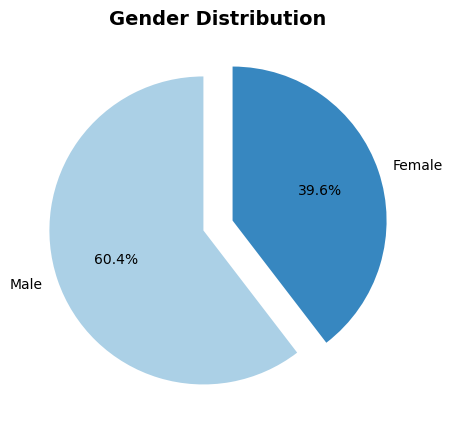

In [15]:
# Set the size of the figure
plt.figure(figsize=(8,5))
# Calculate the counts
gender_counts = df['Gender'].value_counts()
# Use the 'muted' color palette for the pie chart
colors = sns.color_palette('Blues', n_colors=2)
# Create the plot
plt.pie(gender_counts, labels=gender_counts.index,explode=(0.1, 0.1), autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gender Distribution',fontsize=14, fontweight='bold')
# Save the plot as a PNG file
plt.savefig('gender_distribution_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* The majority of employees are male(60.4%), with the remaining portion being female(39.6%).

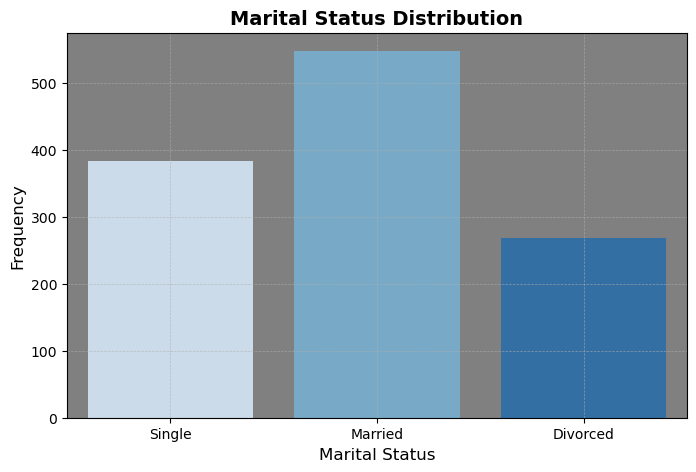

In [17]:
# Set the size of the figure
plt.figure(figsize=(8,5))
# Create the plot
sns.countplot(data=df, x='MaritalStatus',palette='Blues',hue='MaritalStatus')
plt.title('Marital Status Distribution',fontsize=14, fontweight='bold')
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light gray background
# Save the plot as a PNG file
plt.savefig('maritalstatus_distribution_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Over 500 employees are married, followed by approximately 400 single employees. The number of divorced employees is fewer than 300.

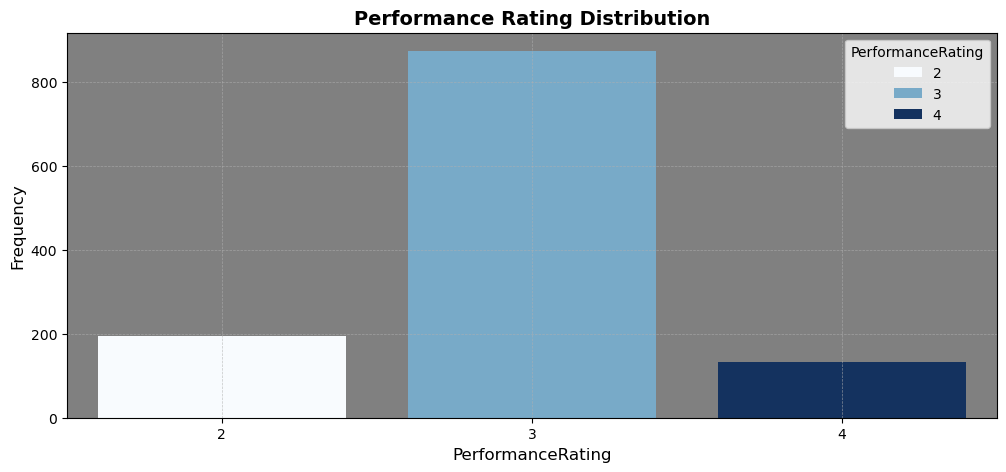

In [19]:
# Set the size of the figure
plt.figure(figsize=(12,5))
# Create the plot
sns.countplot(data=df, x='PerformanceRating',palette='Blues',hue='PerformanceRating')
plt.title('Performance Rating Distribution',fontsize=14, fontweight='bold')
plt.xlabel("PerformanceRating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light background for contrast
# Save the plot as a PNG file
plt.savefig('PerformanceRating_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* There is a class imbalance in performance ratings, with over 800 employees rated 3, followed by around 200 employees rated 2, and fewer than 200 employees rated 4.

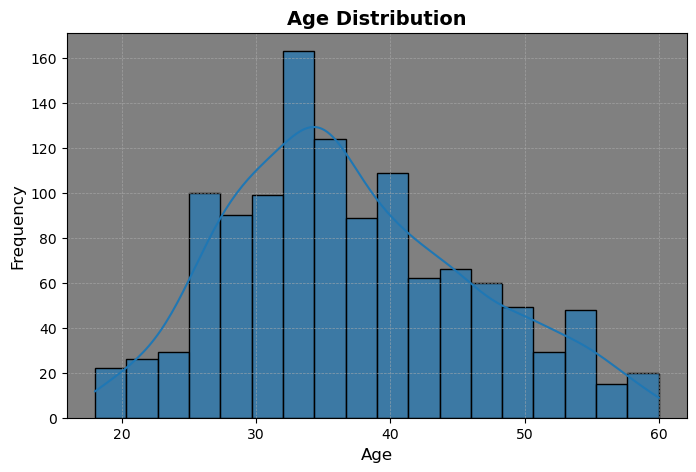

In [21]:
# Set the size of the figure
plt.figure(figsize=(8,5))
# Create the plot
sns.histplot(data=df, x='Age',alpha=0.7, edgecolor='black',kde=True)
plt.title('Age Distribution',fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light gray background
  # Light background for contrast
# Save the plot as a PNG file
plt.savefig('age_distribution_.png',dpi=300,  transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* The minimum employee age is **18**, while the maximum is **60**. The majority of employees are **36 years old**, and the age distribution is **right-skewed**, indicating more younger employees than older ones.

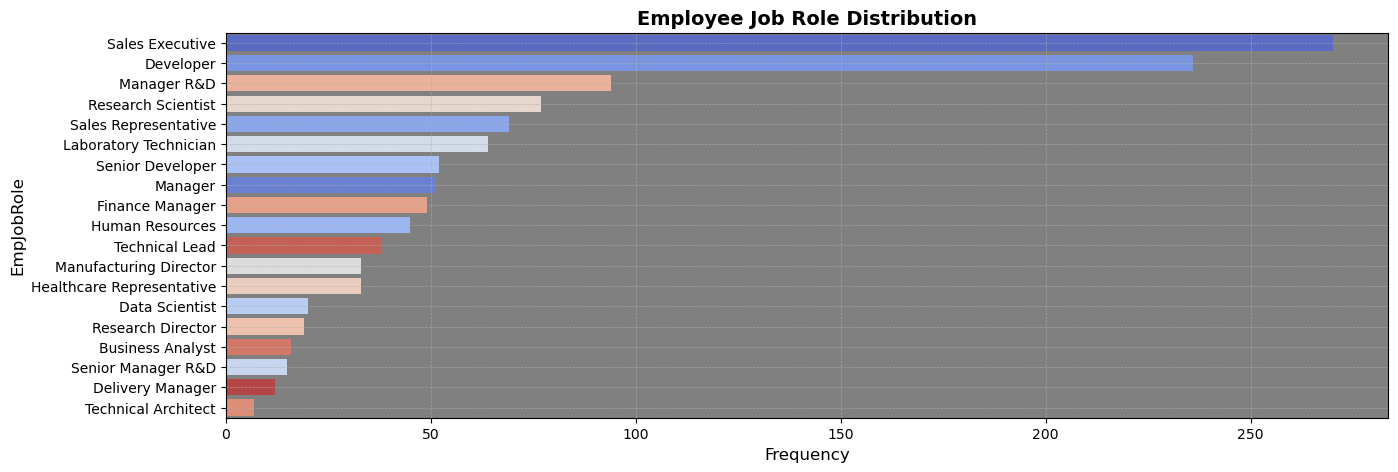

In [23]:
# Set the size of the figure
plt.figure(figsize=(15,5))
# Sort job roles by count
sorted_roles = df['EmpJobRole'].value_counts().index
# Create the plot
sns.countplot(data=df, y='EmpJobRole',hue='EmpJobRole', palette='coolwarm',order=sorted_roles)
plt.title('Employee Job Role Distribution',fontsize=14,fontweight='bold')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("EmpJobRole", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light background for contrast
# Save the plot as a PNG file
plt.savefig('empjobrole_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Sales Executives have the highest number of employees, with over 250, followed by Developers, who have more than 200. Most other job roles have fewer than 100 employees. Some roles, like Manager R&D, Research Scientist, Sales Representative, Laboratory Technician, Senior Developer, and Manager, have between 50 and 100 employees. The rest, including Finance Manager, Human Resources, Technical Lead, Manufacturing Director, Healthcare Representative, Data Scientist, Research Director, Business Analyst, Senior Manager R&D, Delivery Manager, and Technical Architect, have fewer than 50 employees.

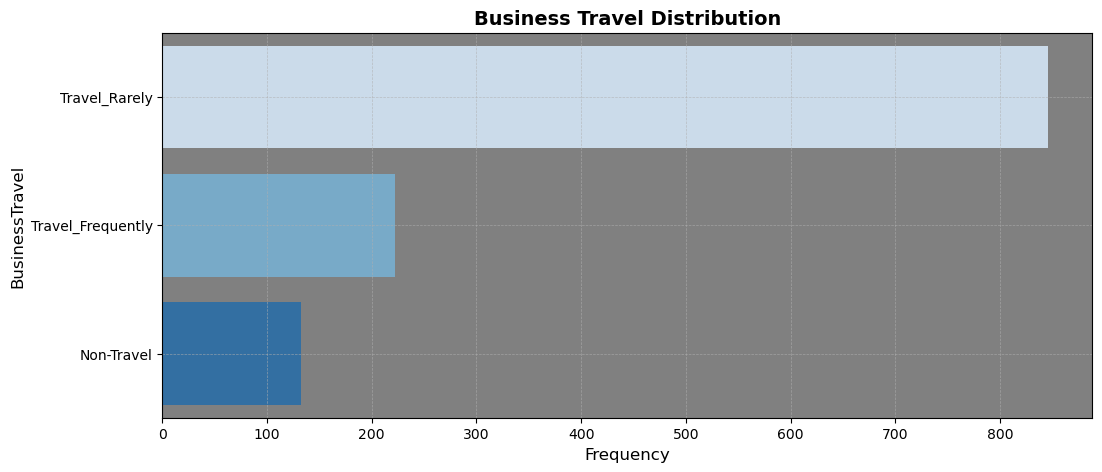

In [25]:
# Set the size of the figure
plt.figure(figsize=(12,5))
# Sort business travel by count
sorted_roles = df['BusinessTravelFrequency'].value_counts().index
# Create the plot
sns.countplot(data=df, y='BusinessTravelFrequency',hue='BusinessTravelFrequency', palette='Blues')
plt.title('Business Travel Distribution',fontsize=14,fontweight='bold')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("BusinessTravel", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  #Light background for contrast
# Save the plot as a PNG file
plt.savefig('businesstravelfrequency_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* The majority of employees, over 800, rarely travel for business. Around 200 travel frequently, while just over 100 do not travel at all.

### Multivariate Visualizations

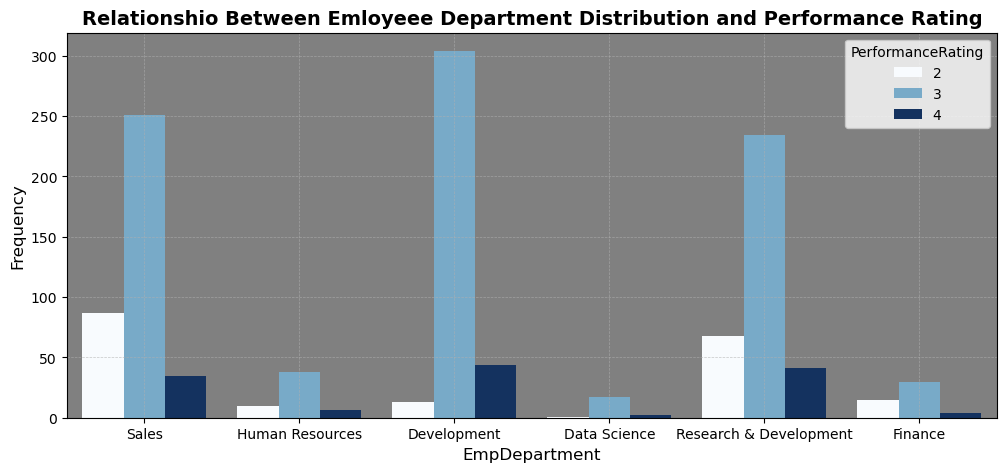

In [28]:
# Set the size of the figure
plt.figure(figsize=(12,5))
# Create the plot
sns.countplot(data=df, x='EmpDepartment',palette='Blues',hue='PerformanceRating')
plt.title('Relationshio Between Emloyeee Department Distribution and Performance Rating',fontsize=14, fontweight='bold')
plt.xlabel("EmpDepartment", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light background for contrast
# Save the plot as a PNG file
plt.savefig('empdepartment_PerformanceRating.png',dpi=300,  transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

##### Department Wise Performances
* The bar chart highlights department-wise performance variations, with **most employees receiving a rating of 3 across all departments**. Departments with a higher proportion of rating 2 than 4 may indicate performance challenges, while those with more rating 4 than 2 suggest stronger performance.  
* 
Development has the highest number of employees (around 300) with a satisfactory rating (3), along with the highest count of excellent-rated employees (4) at nearly 50, while poorly rated employees (2) are fewer than 25. Sales follows, with approximately 250 employees rated 3, a significant number (around 100) rated 2, and fewer achieving rating 4. Research & Development and Finance show a similar trend to Sales. In contrast, Human Resources has a relatively balanced distribution between poorly and excellently rated employees. Notably, Data Science, despite having the fewest employees, has more employees rated 4 than those rated 2.  *

These insights can help organizations implement targeted training, workload adjustments, and managerial improvements to enhance overall productivity.

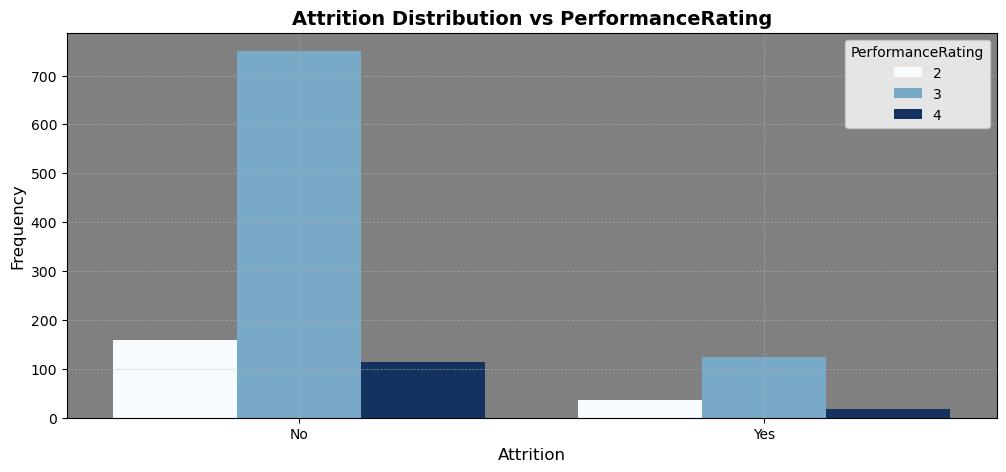

In [30]:
# Set the size of the figure
plt.figure(figsize=(12,5))
# Create the plot
sns.countplot(data=df, x='Attrition',palette='Blues',hue='PerformanceRating')
plt.title('Attrition Distribution vs PerformanceRating',fontsize=14, fontweight='bold')
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light background for contrast
# Save the plot as a PNG file
plt.savefig('attrition_PerformanceRating.png',dpi=300,  transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Among the employees who did not experience attrition, over 700 had a satisfactory performance rating of 3, while around 100 had an outstanding rating of 4. On the other hand, among those who experienced attrition, close to 50 had a poor performance rating of 2, about 100 had a satisfactory rating of 3, and fewer than 50 had an outstanding rating of 4

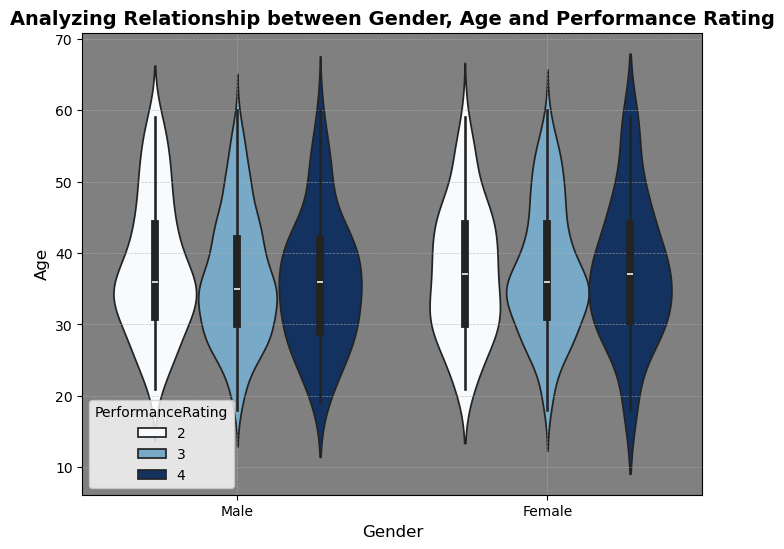

In [32]:
# Set the size of the figure
plt.figure(figsize=(8,6))
# Create a violinplot to visualize the relationship between Gender and Attrition
sns.violinplot(data=df, x='Gender',y='Age',hue='PerformanceRating', palette='Blues')
# Add axis labels with enhanced styling
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light background for contrast
plt.title("Analyzing Relationship between Gender, Age and Performance Rating",fontsize=14, fontweight='bold')
plt.savefig('perfromancerating_gender.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

* A slightly higher proportion of male employees have a performance rating of 2 compared to female employees. However, other performance ratings are evenly distributed between genders, suggesting equal opportunities in performance evaluation. Additionally, the majority of employees are between 30 and 40 years old, indicating that the workforce primarily consists of mid-career professionals.

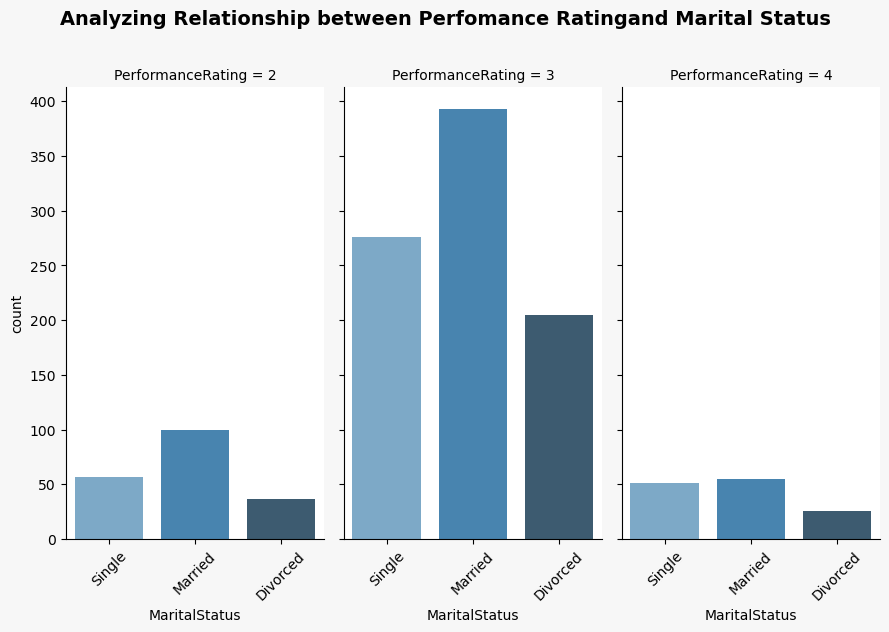

In [34]:
# Create a Clustered Bar Chart to visualize the relationship between Gender, Attrion and Marital Status 
g=sns.catplot(data=df, x='MaritalStatus', hue='MaritalStatus', col='PerformanceRating', kind='count', palette='Blues_d',height=6, aspect=0.5)
# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45)
# Set background color for the entire figure
g.figure.patch.set_facecolor('#f7f7f7')
g.fig.suptitle("Analyzing Relationship between Perfomance Ratingand Marital Status",fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.85) 
g.savefig('maritalstatus_perfomance.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()


* Employees with a performance rating of 2 are primarily married individuals, totaling around 100, followed by single employees, who number close to 50, and then divorced individuals had a poor performance of 2.
* For a performance rating of 3, married employees make up the largest group at approximately 350, followed by single employees, who are slightly above 250, and divorced individuals, who are slightly close to 200 had a satisfactory performance of 3.
* For a performance rating of 4, married employees form the majority, with close to 50 individuals, followed by single employees, who are fewer than that, and then divorced individuals had an outstanding performance of 4.

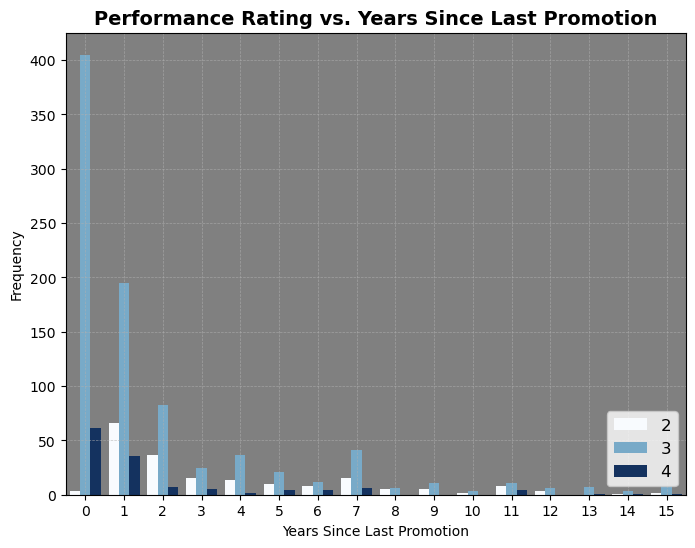

In [36]:
# Set the size of the figure
plt.figure(figsize=(8,6))
# Create a count plot to visualize the relationship between Performance Rating and Years Since Last Promotion
sns.countplot(data=df, x='YearsSinceLastPromotion', hue='PerformanceRating',palette='Blues')
plt.title('Performance Rating vs. Years Since Last Promotion', fontsize=14, fontweight='bold')
plt.legend(loc='lower right',fontsize=12)
# Add axis labels with enhanced styling
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light background for contrast
plt.savefig('YearsSinceLastPromotion_PerformanceRating.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()


* In the first year (0 years since the last promotion), most employees (over 400) were promoted and received a satisfactory performance rating of 3, while more than 50 achieved an outstanding rating of 4—with only a very small number showing poor performance compared to other years. Overall, performance rating 3 dominates across all time frames. Although performance rating 4 is the least common group, it still appears consistently in periods beyond the first year until 8 years, showing a decline in outstanding performance ratings if employees go prolonged periods without a promotion. Additionally, a few employees haven't received a promotion in 10 to 15 years.

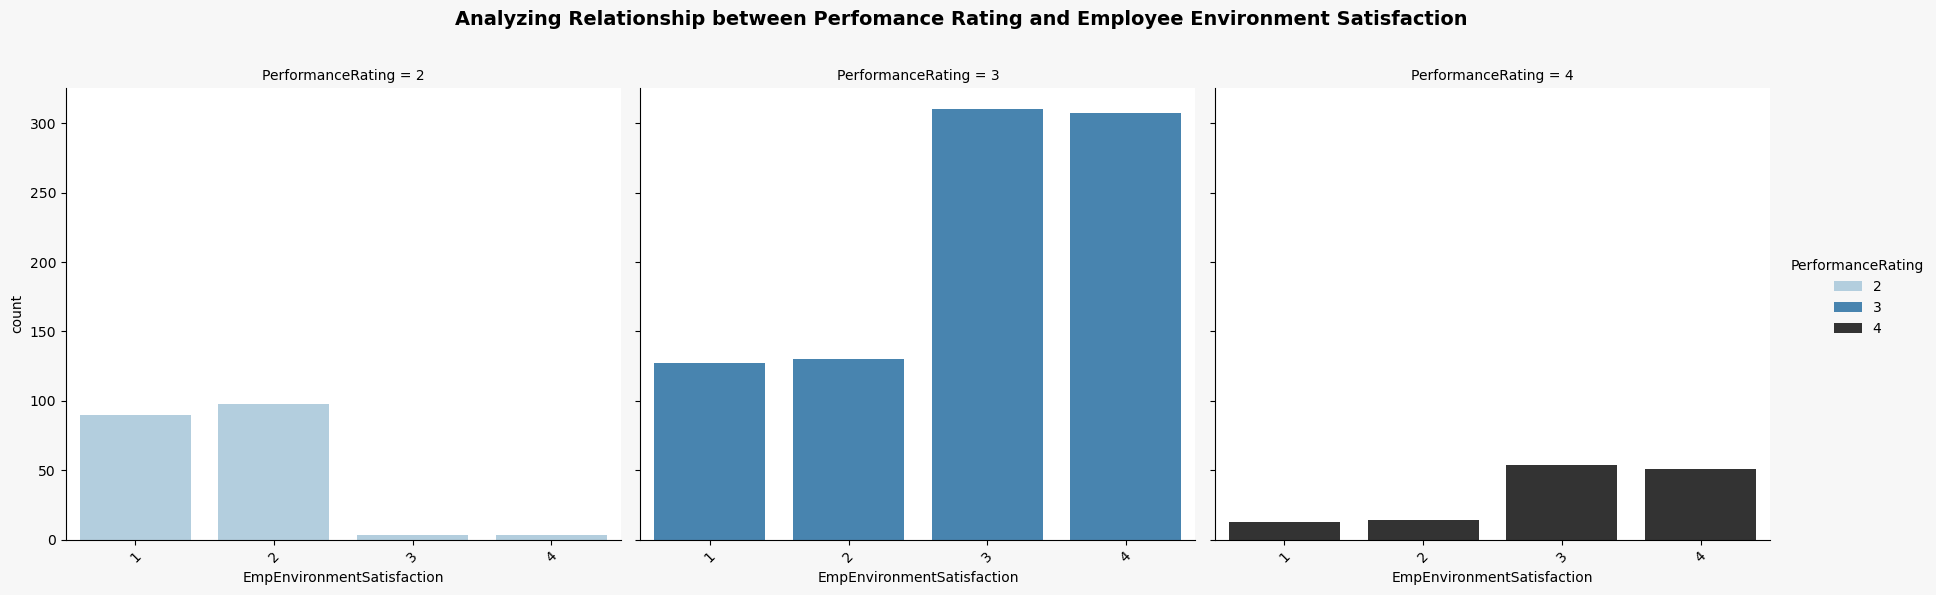

In [38]:
# Create a Clustered Bar Chart to visualize the relationship between  Perfomance Rating and Employee Environment Satisfaction
g=sns.catplot(data=df, x='EmpEnvironmentSatisfaction', col='PerformanceRating', kind='count',height=6,palette='Blues_d', hue='PerformanceRating',aspect=1)
# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45)
# Set background color for the entire figure
g.figure.patch.set_facecolor('#f7f7f7')
g.fig.suptitle("Analyzing Relationship between Perfomance Rating and Employee Environment Satisfaction",fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.85) 
g.savefig('EmployeeEnvironmentSatisfaction_performancerating_perfomance.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

* Employees with **higher environment satisfaction tend to have better performance ratings.** Those who rate their work environment as "Excellent" dominate the high-performance category, while those with "Poor" satisfaction are more likely to underperform. This suggests that a positive workplace environment plays a crucial role in employee productivity and engagement. To enhance performance across the organization, companies should focus on improving workplace conditions, fostering a supportive culture, and addressing any dissatisfaction among employees. Creating a more engaging and comfortable work setting could lead to noticeable improvements in overall performance.

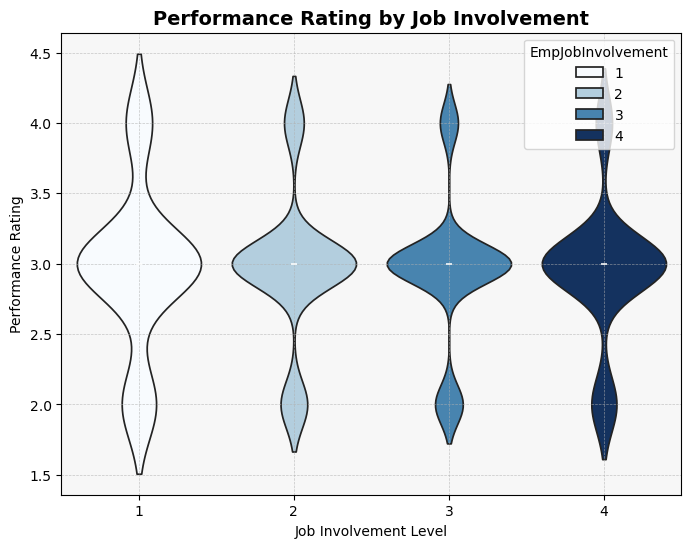

In [40]:
# Set the size of the figure
plt.figure(figsize=(8,6))
# Create a violinplot to visualize the relationship between EmpJobInvolvement and PerformanceRating
sns.violinplot(data=df, x='EmpJobInvolvement', y='PerformanceRating',hue='EmpJobInvolvement', palette='Blues')
plt.title('Performance Rating by Job Involvement', fontsize=14, fontweight='bold')
# Add axis labels with enhanced styling
plt.xlabel('Job Involvement Level')
plt.ylabel('Performance Rating')
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#f7f7f7')  # Light background for contrast
plt.savefig('EmpJobInvolvement_PerformanceRating.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

* Across all job involvement levels, the average perfromance rating is 3. Job involvement level 1 has more employees with a poor performance level of 2 compared to the other levels while others have an outstanding performance rating of 4.This shows that some employees with low involvement perform well, but others receive the lowest ratings. Employees with higher involvement (3 and 4) are more likely to stay around the expected rating of 3 or above showing consistency in this groups. 

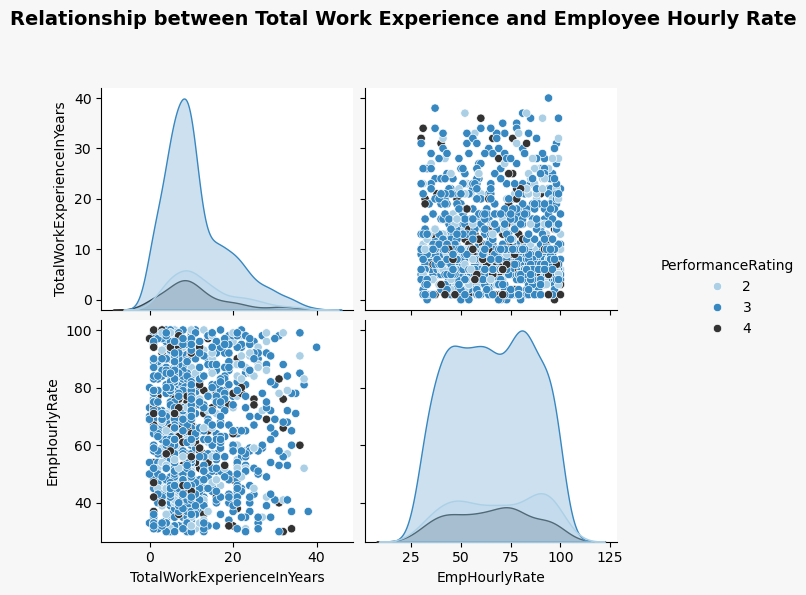

In [42]:
# Create a pairplot to visualize the relationship between Total Work Experience and Employee Hourly Rate
g=sns.pairplot(df[['TotalWorkExperienceInYears', 'EmpHourlyRate', 'PerformanceRating']],hue='PerformanceRating',palette='Blues_d',height=3)
# Set background color for the entire figure
g.figure.patch.set_facecolor('#f7f7f7')
g.fig.suptitle("Relationship between Total Work Experience and Employee Hourly Rate",fontsize=14, fontweight='bold')
plt.savefig('totalworkexperience_employeehourlyrate.png',dpi=300, transparent=True, bbox_inches='tight')
plt.subplots_adjust(top=0.85) 
plt.show()


Most employees have a work experience 0-10 year and have an employee hourly rate of between 25 - 100%. Performance ratings are evenly distributed across total work experience and salary meaning it is not a strong predictor of salary.

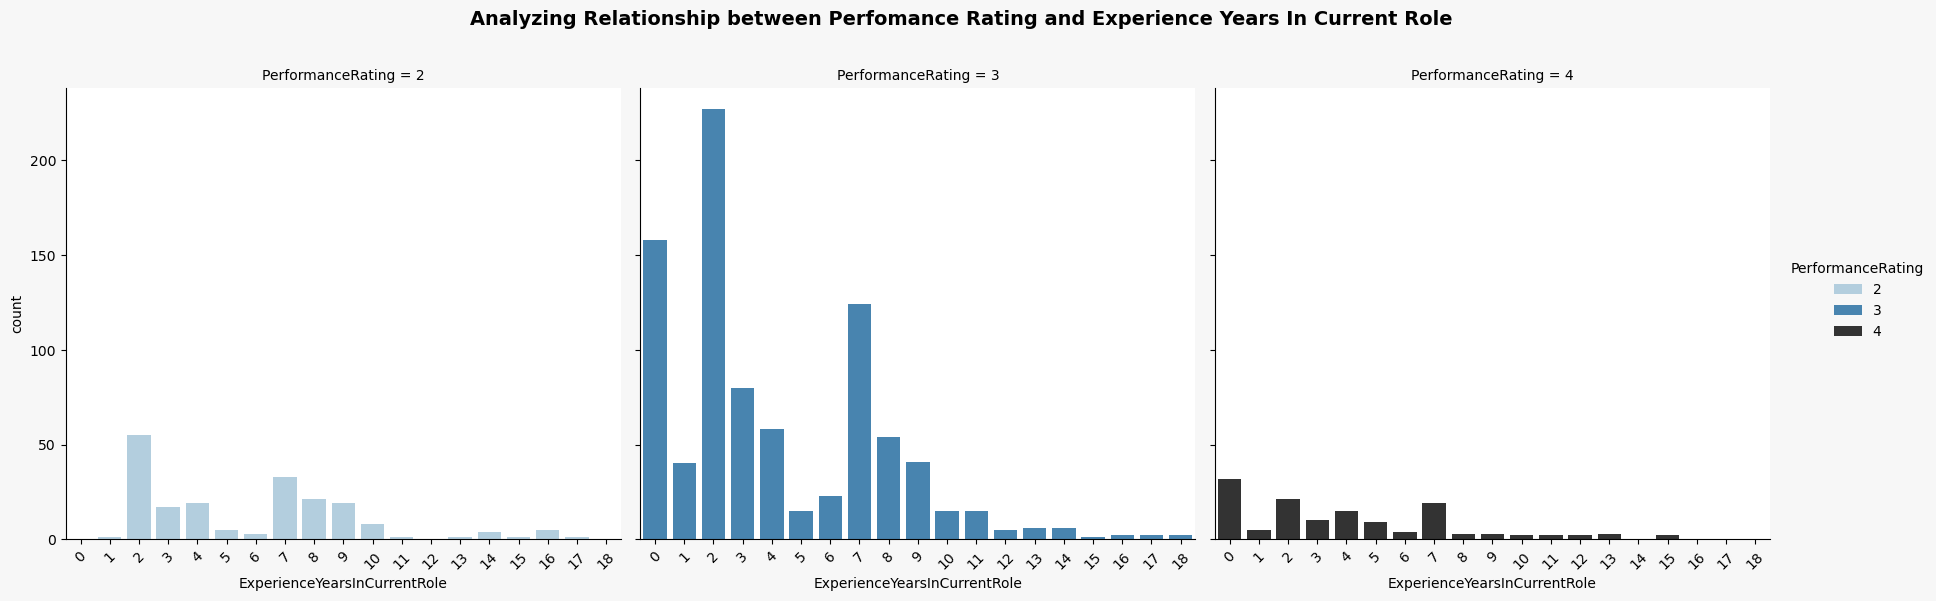

In [44]:
# Create a Clustered Bar Chart to visualize the relationship between Perfomance Rating and Experience Years In Current Role
g=sns.catplot(data=df, x='ExperienceYearsInCurrentRole', col='PerformanceRating', kind='count',palette='Blues_d',hue='PerformanceRating',height=6, aspect=1)
# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45)
# Set background color for the entire figure
g.figure.patch.set_facecolor('#f7f7f7')
g.fig.suptitle("Analyzing Relationship between Perfomance Rating and Experience Years In Current Role",fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.85) 
g.savefig('experienceyearsincurrentrole_performancerating_perfomance.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

* Employees with a few years of experience in their current role tend to have the highest performance ratings, indicating that moderate experience is a strong driver of success. On the other hand, those who are new to their roles often struggle, possibly due to a learning curve or lack of familiarity with responsibilities. Interestingly, employees who have spent many years in the same position do not always exhibit top performance, which could point to stagnation or declining motivation over time. 

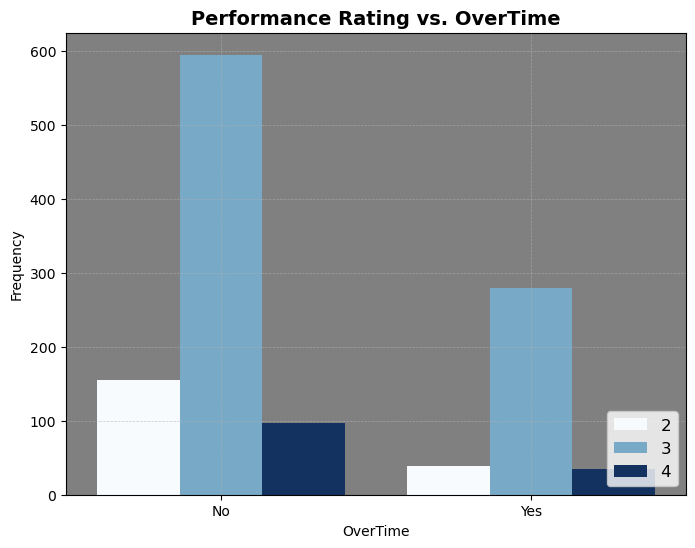

In [46]:
# Set the size of the figure
plt.figure(figsize=(8,6))
# Create a count plot to visualize the relationship between Performance Rating and OverTime
sns.countplot(data=df, x='OverTime', hue='PerformanceRating',palette='Blues')
plt.title('Performance Rating vs. OverTime', fontsize=14, fontweight='bold')
plt.legend(loc='lower right',fontsize=12)
# Add axis labels with enhanced styling
plt.xlabel('OverTime')
plt.ylabel('Frequency')
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#808080')  # Light background for contrast
plt.savefig('OverTime_PerformanceRating.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

* About 600 employees who do not work overtime had a satisfactory performance rating(3), over 100 employees had a poor performance rating(2) while around 100 had an outstanding rating(4). Among those who work overtime, about 300 had a satisfactory rating(3), and fewer than 50 had an outstanding rating(4) and a poor performance rating(2).

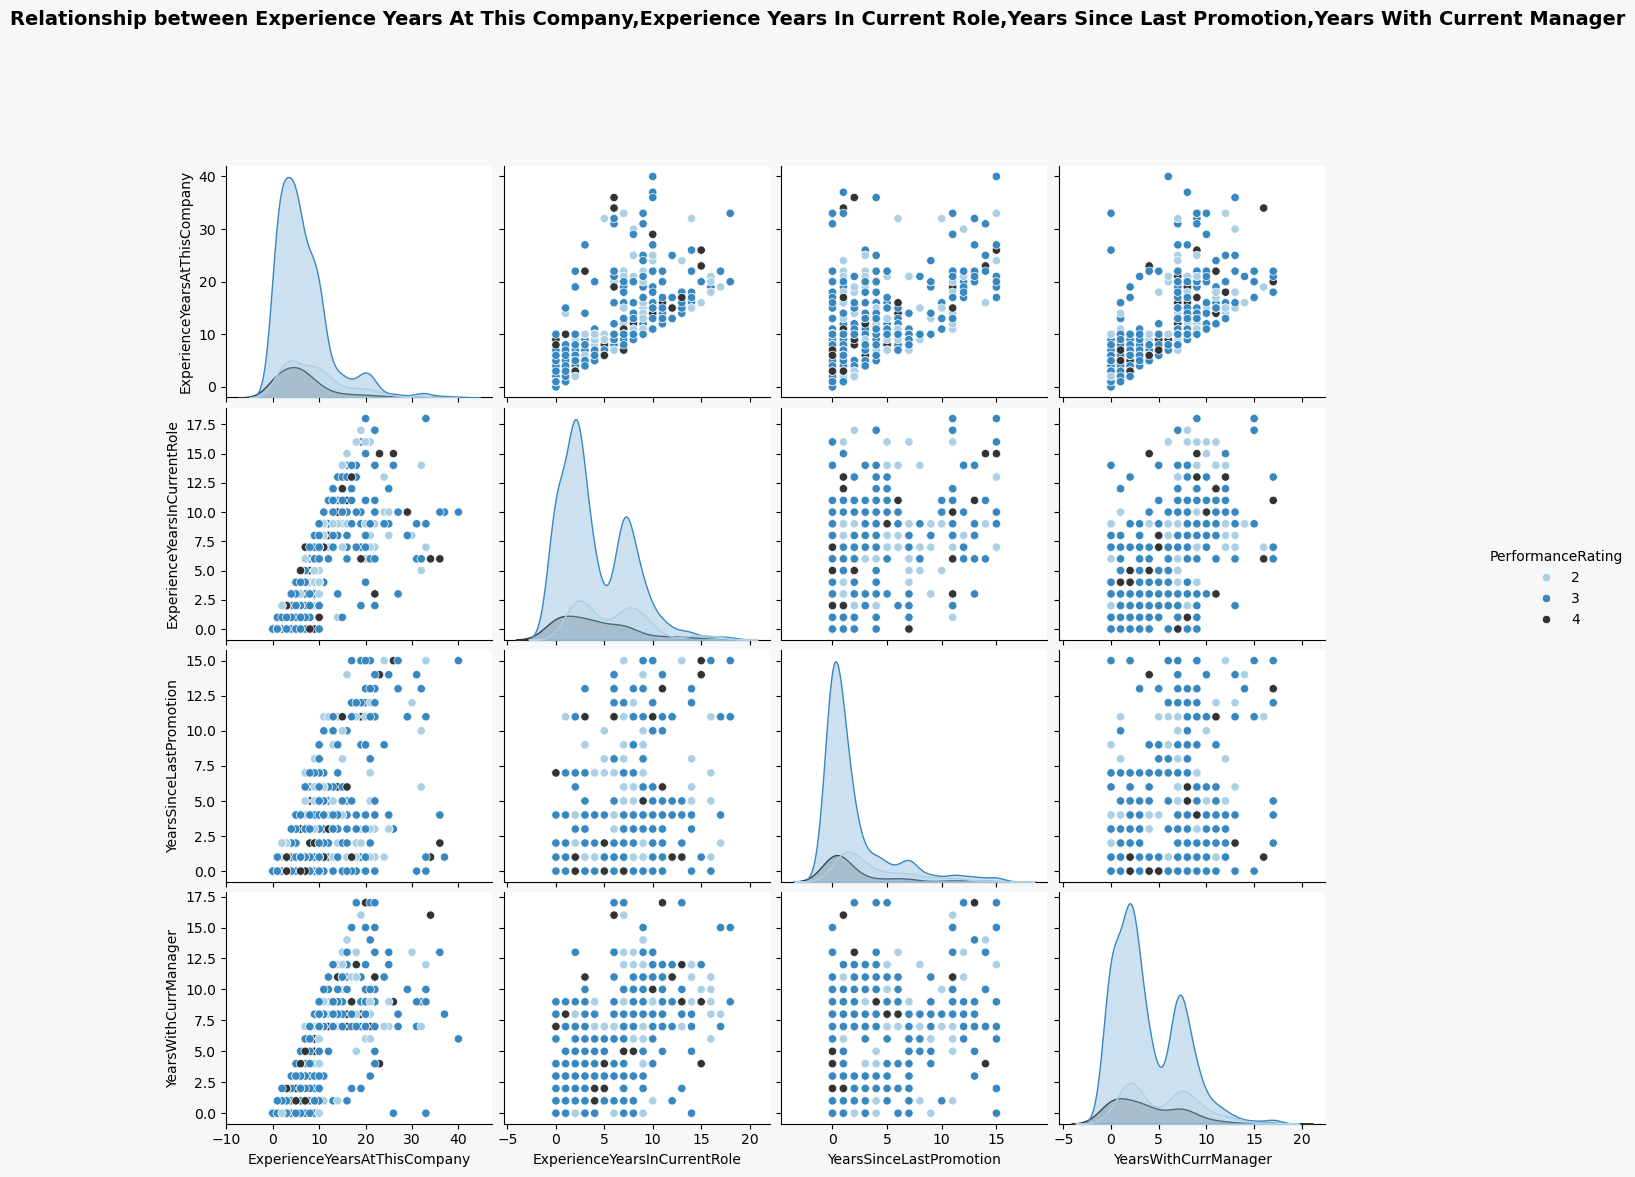

In [48]:
# Create a pairplot to visualize the relationship between Total Work Experience and Employee Hourly Rate
g=sns.pairplot(df[['ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PerformanceRating']],hue='PerformanceRating',palette="Blues_d",height=3)
# Set background color for the entire figure
g.figure.patch.set_facecolor('#f7f7f7')
g.fig.suptitle("Relationship between Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Current Manager",fontsize=14, fontweight='bold')
plt.savefig('years.png',dpi=300,  transparent=True,bbox_inches='tight')
plt.subplots_adjust(top=0.85) 
plt.show()


* Employees with longer experience at the company also tend to have spent more time in their current role indicating a strong postive correlation between experience years at Company and Experience years in current role. However some employees have changed roles multiple times.
* Employees who have been with the company longer generally have more years since their last promotion indicating a moderate positive correlation between experience years at company and  years since last promotion.Meaning that long tenure does not guarantee frequent promotions.
* Employees who have worked in the same role for many years often remain with the same manager for large periods showing a strong positive correlation between years in current role and years with current manager. However some employees have changed managers multiple times.
* Employees who have been with the company longer generally have more years since their last promotion indicating a moderate positive correlation between experience years at company and  years since last promotion.Meaning that long tenure does not guarantee frequent promotions.
* Employees with more experience years often remain with the same manager for large periods showing a strong positive correlation between experience years and years with current manager. However some employees have changed managers multiple times.
* Employees who stay longer under the same manager tend to go longer without a promotion indicating a weak positive correlation between years since last promotion and years with current manager. This could indicate overlooked talent.
* Performance ratings are evenly distributed in all diagrams as shown above.Meaning it doesn't have a huge impact on these variables.


In [50]:
df['Gender_encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['EducationBackground_encoded'] = df['EducationBackground'].map({'Marketing': 0, 'Life Sciences': 1, 'Human Resources': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5})
df['MaritalStatus_encoded'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df['EmpDepartment_encoded'] = df['EmpDepartment'].map({'Sales': 0, 'Human Resources': 1, 'Development': 2, 'Data Science': 3, 'Research & Development': 4, 'Finance': 5})
df['EmpJobRole_encoded'] = df['EmpJobRole'].map({'Sales Executive': 0, 'Manager': 1, 'Developer': 2, 'Sales Representative': 3, 'Human Resources': 4, 'Senior Developer': 5, 'Data Scientist': 6, 'Senior Manager R&D': 7, 'Laboratory Technician': 8, 'Manufacturing Director': 9, 'Research Scientist': 10, 'Healthcare Representative': 11, 'Research Director': 12, 'Manager R&D': 13, 'Finance Manager': 14, 'Technical Architect': 15, 'Business Analyst': 16, 'Technical Lead': 17, 'Delivery Manager': 18})
df['BusinessTravelFrequency_encoded'] = df['BusinessTravelFrequency'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2})
df['OverTime_encoded'] = df['OverTime'].map({'No': 0, 'Yes': 1})
df['Attrition_encoded'] = df['Attrition'].map({'No': 0, 'Yes': 1})

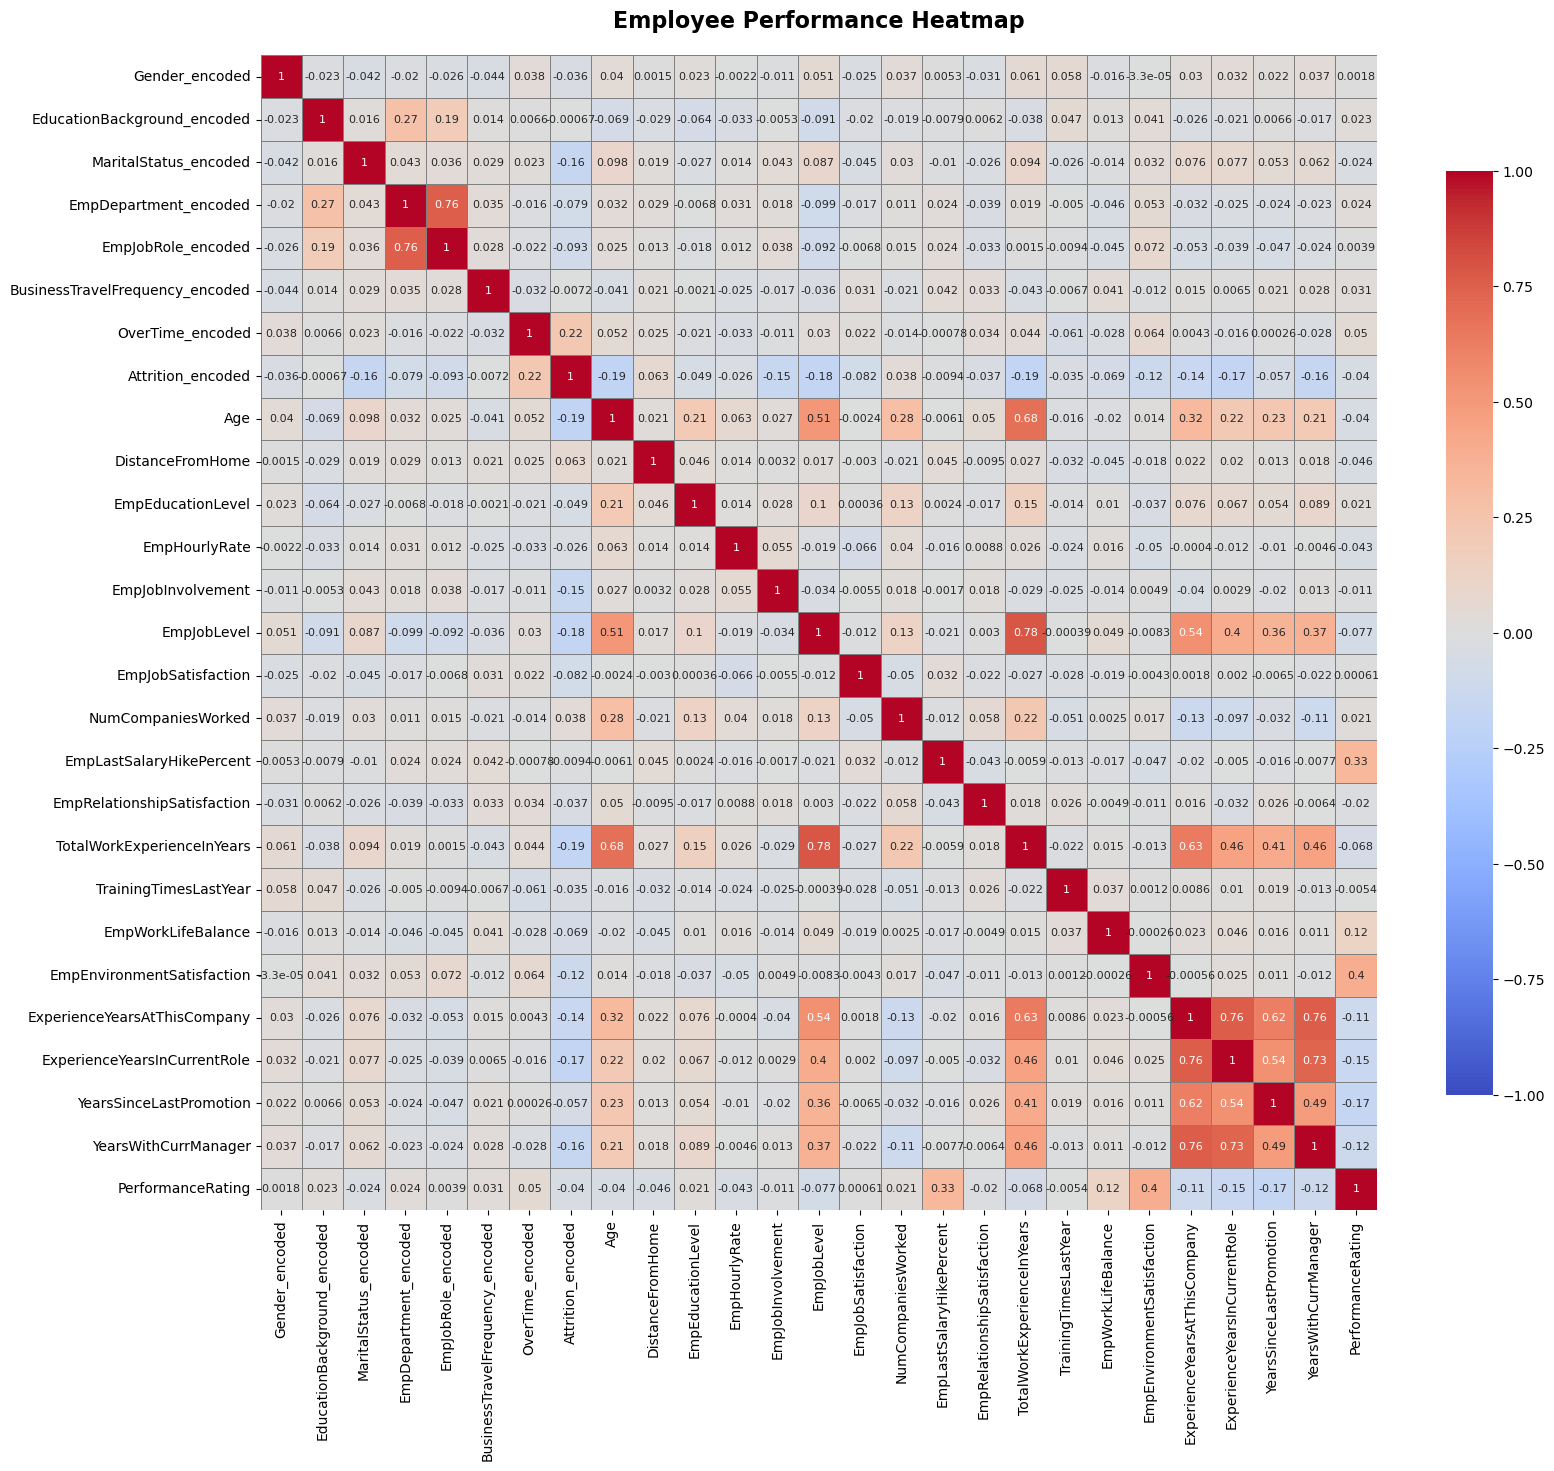

In [51]:
# Set the size of the figure
plt.figure(figsize=((18,15)))
# Select relevant columns for analysis
columns=df[['Gender_encoded','EducationBackground_encoded','MaritalStatus_encoded','EmpDepartment_encoded','EmpJobRole_encoded','BusinessTravelFrequency_encoded','OverTime_encoded','Attrition_encoded','Age','DistanceFromHome','EmpEducationLevel','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance','EmpEnvironmentSatisfaction','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PerformanceRating']]
# Calculate the correlation matrix for the selected columns
matrix = columns.corr()
# Plot the heatmap with annotations and a 'coolwarm' color palette
sns.heatmap(matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1,linewidths=0.5,linecolor='gray',annot_kws={"size": 8},cbar_kws={"shrink": 0.8})
# Add a title to the heatmap
plt.title("Employee Performance Heatmap",fontsize=16, fontweight='bold', pad=20)
# Save the heatmap as a PNG file
plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight')
# Display the heatmap
plt.show()

- **Employee Environment Satisfaction(0.4), Employee Last Salary Hike Percent (0.33) and Employee Work-Life Balance (0.12)** have a weak positive correlation with **Performance Rating**, indicating a minor positive impact on performance rating.
- **Employee Department (-0.16)** suggests that performance ratings may vary across departments, warranting further investigation.
**Experience Years at This Company (-0.11), Experience Years in Current Role (-0.15), Years Since Last Promotion (-0.17), and Years with Current Manager (-0.12)** are weakly negatively correlated with **Performance Rating**, indicating that longer tenure in a role without progression may reduce motivation and performance ratings.
-  **Gender, Education Background, Marital Status, Business Travel Frequency, Overtime, Attrition, Age, Distance from Home, Employee Education Level, Employee Hourly Rate, Employee Job Involvement, Employee Job Level, Employee Job Satisfaction, Number of Companies Worked, Employee Relationship, Total Work Experience in Years, and Training Times Last Year** are weakly correlated with **Performance Rating**, as their correlation values are close to zero.  
- **Overall, the variables are weakly correlated with performance rating, suggesting that other factors contribute more significantly to performance outcomes.

### Feature Selection

In [54]:
# Identify the target variable and features
X=df[['EmpDepartment_encoded','EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction','EmpJobRole_encoded','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
y=df['PerformanceRating']

* The other features are weakly correlated with Performance Rating, as their correlation values are close to zero based on the heatmap and visualizations. Therefore, they were excluded from the analysis.


In [56]:
#Standardize the data using Standard Scaler
standard_scaler=StandardScaler()
X=standard_scaler.fit_transform(X)

In [57]:
#Split the data into training and testing sets (e.g., 80-20 split).
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

## Model Selection

### Decision Tree Model

In [60]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
#Make predictions
y_pred=dt.predict(X_test)
#Calculate the metrics and print the results
accuracy_dt=accuracy_score(y_test,y_pred)
classification_dt=classification_report(y_test,y_pred)
matrix_dt= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_dt)
print("Classification Report:", classification_dt)
print("Confusion Matrix\n", matrix_dt)

Accuracy Score: 0.8708333333333333
Classification Report:               precision    recall  f1-score   support

           2       0.75      0.72      0.74        29
           3       0.92      0.91      0.92       184
           4       0.69      0.74      0.71        27

    accuracy                           0.87       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.87      0.87      0.87       240

Confusion Matrix
 [[ 21   8   0]
 [  7 168   9]
 [  0   7  20]]


## Results:
##### Accuracy:
- 87% of predictions are correct (either class 2,3, or 4). It shows that the model is a good fit.
##### Precision:
- For class 2 (performance rating 2): 75% of the predictions made as 0 were correct.
- For class 3 (performance rating 3): 92% of the predictions made as 1 were correct.
- For class 4 (performance rating 4): 69% of the predictions made as 2 were correct.
##### Recall:
- For class 2 (performance rating 2): 72% of actual 0 cases were correctly predicted.
- For class 3 (performance rating 3): 91% of actual 1 cases were correctly predicted.
- For class 4 (performance rating 4): 74% of actual 2 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 2: 0.74 - Good overall performance for this class.
- Class 3: 0.92 - Strong performance for this class.
- Class 4: 0.71 - Good performance for this class.
##### Confusion Matrix:
- Class 2 (performance rating 2): 21 were correctly classified, while 8 was misclassified as Class 3.
- Class 3 (performance rating 3): 168 were correctly classified, with 7 misclassified as Class 2 and 9 as Class 3.
- Class 4 (performance rating 4): 20 were correctly classified, but 7 was misclassified  as Class 3.

### Random Forest Model

In [63]:
#Initialize and train the model
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
#Make predictions
y_pred=rf.predict(X_test)
#Calculate the metrics and print the results
accuracy_rf=accuracy_score(y_test,y_pred)
classification_rf=classification_report(y_test,y_pred)
matrix_rf= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_rf)
print("Classification Report:", classification_rf )
print("Confusion Matrix\n", matrix_rf)

Accuracy Score: 0.9375
Classification Report:               precision    recall  f1-score   support

           2       0.87      0.90      0.88        29
           3       0.95      0.97      0.96       184
           4       0.95      0.74      0.83        27

    accuracy                           0.94       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.94      0.94      0.94       240

Confusion Matrix
 [[ 26   3   0]
 [  4 179   1]
 [  0   7  20]]


## Results:
##### Accuracy:
- 94% of predictions are correct (either class 2,3, or 4). It shows that the model is a good fit.
##### Precision:
- For class 2 (performance rating 2): 87% of the predictions made as 0 were correct.
- For class 3 (performance rating 3): 95% of the predictions made as 1 were correct.
- For class 4 (performance rating 4): 95% of the predictions made as 2 were correct.
##### Recall:
- For class 2 (performance rating 2): 90% of actual 0 cases were correctly predicted.
- For class 3 (performance rating 3): 97% of actual 1 cases were correctly predicted.
- For class 4 (performance rating 4): 74% of actual 2 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 2: 0.88 - Good overall performance for this class.
- Class 3: 0.96 - Strong performance for this class.
- Class 4: 0.83 - Good performance for this class.
##### Confusion Matrix:
- Class 2 (performance rating 2): 26 were correctly classified, while 3 was misclassified as Class 3.
- Class 3 (performance rating 3): 179 were correctly classified, with 4 misclassified as Class 2 and 1 as Class 3.
- Class 4 (performance rating 4): 20 were correctly classified, but 7 was misclassified as Class 3.

### Gradient Boosting Model

In [66]:
#Initialize and train the model
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)
#Make predictions
y_pred=gb.predict(X_test)
#Calculate the metrics and print the results
accuracy_gb=accuracy_score(y_test,y_pred)

classification_gb=classification_report(y_test,y_pred)
matrix_gb= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_gb)
print("Classification Report:", classification_gb )
print("Confusion Matrix\n", matrix_gb)

Accuracy Score: 0.925
Classification Report:               precision    recall  f1-score   support

           2       0.86      0.83      0.84        29
           3       0.94      0.97      0.95       184
           4       0.91      0.74      0.82        27

    accuracy                           0.93       240
   macro avg       0.90      0.85      0.87       240
weighted avg       0.92      0.93      0.92       240

Confusion Matrix
 [[ 24   5   0]
 [  4 178   2]
 [  0   7  20]]


## Results:
##### Accuracy:
- 93% of predictions are correct (either class 2,3, or 4). It shows that the model is a good fit.
##### Precision:
- For class 2 (performance rating 2): 86% of the predictions made as 0 were correct.
- For class 3 (performance rating 3): 94% of the predictions made as 1 were correct.
- For class 4 (performance rating 4): 91% of the predictions made as 2 were correct.
##### Recall:
- For class 2 (performance rating 2): 83% of actual 0 cases were correctly predicted.
- For class 3 (performance rating 3): 97% of actual 1 cases were correctly predicted.
- For class 4 (performance rating 4): 74% of actual 2 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 2: 0.84 - Weak overall performance for this class.
- Class 3: 0.95 - Strong performance for this class.
- Class 4: 0.82 - Moderate performance for this class.
##### Confusion Matrix:
- Class 2 (performance rating 2): 24 were correctly classified, while 5 was misclassified as Class 3.
- Class 3 (performance rating 3): 178 were correctly classified, with 4 misclassified as Class 2 and 2 as Class 3.
- Class 4 (performance rating 4): 20 were correctly classified, but 7 was misclassified as Class 3.


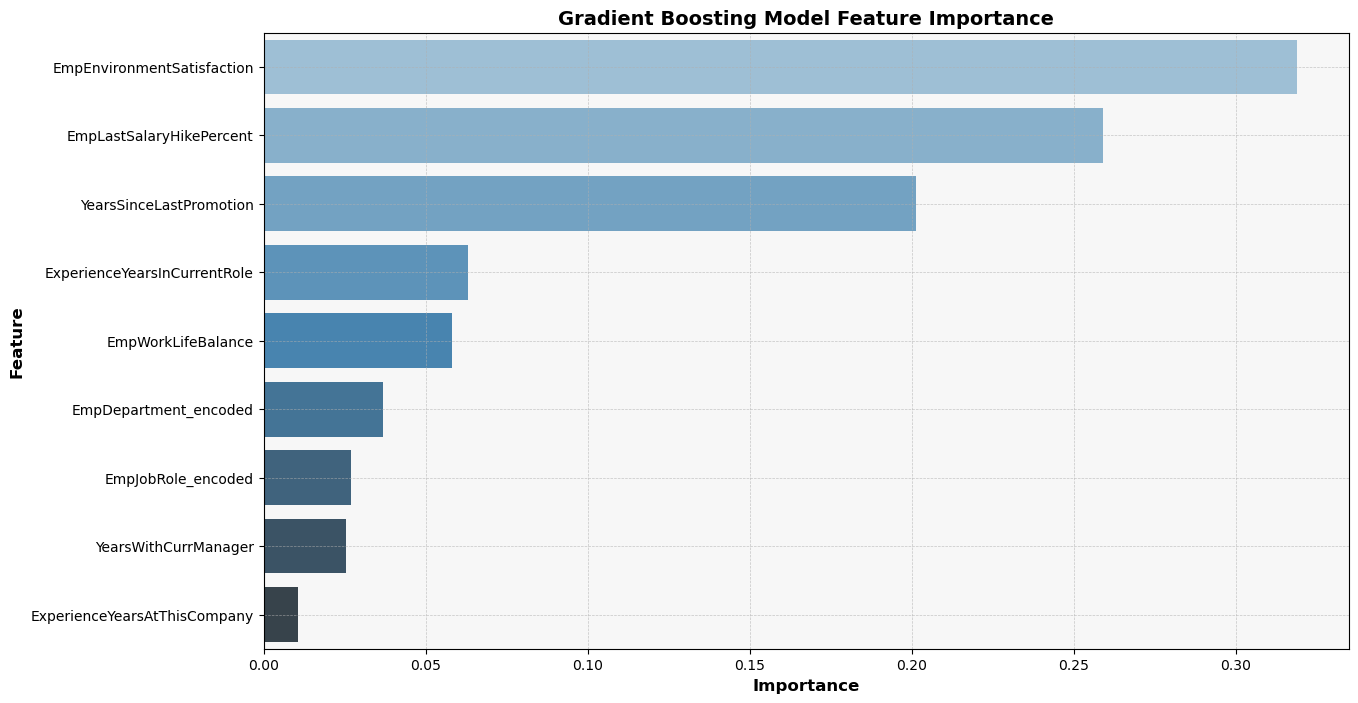

In [68]:
# Calculate and display the importance of each feature based on gradient boosting coefficients
# Assuming `gb` is a trained Gradient Boosting model and `df` contains the dataset
features = ['EmpDepartment_encoded','EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction','EmpJobRole_encoded','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
#Get feature importances
importance_df = pd.DataFrame({
    'feature': features,
    'importance': gb.feature_importances_
}).sort_values(by='importance', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))
# Plot with a blue-green palette
sns.barplot(x='importance', y='feature', data=importance_df, palette='Blues_d', hue='feature', legend=False)
plt.xlabel("Importance", fontsize=12,fontweight='bold')
plt.ylabel("Feature", fontsize=12,fontweight='bold')
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().patch.set_facecolor('#f7f7f7')  # Light background for contrast
plt.title("Gradient Boosting Model Feature Importance", fontsize=14, fontweight='bold')
plt.savefig('feature_importance_barplot.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

**Key Insights:**
* The top three factors that affect employee performance are:

**Work environment satisfaction**– Employees perform better when they feel happy and supported at work.

**Salary hikes** – Fair and competitive raises help keep employees motivated.

**Time since last promotion** – The longer employees go without a promotion, the more their performance may drop.

.


In [70]:
#Save and download the model in pkl format
joblib.dump (gb, 'rf.pkl')
print("Model saved successfully as rf.pkl")


Model saved successfully as rf.pkl


### Recommendations
**Improve Workplace Satisfaction**- Since environment satisfaction is the most influential factor, organizations should invest in employee well-being by fostering a positive work culture, offering flexible work arrangements, and ensuring job security.

**Helping Struggling Departments** – Identifying teams that need extra support and addressing leadership, workload, and engagement challenges will create a more balanced work environment.

**Better Pay & Work-Life Balance** – Offering fair salary increases, flexible work schedules, and wellness programs can help employees feel valued and motivated.

**Opportunities for Growth**  – Providing regular promotions, skill-building workshops, and chances to move within the company can keep employees engaged and productive.

**Fairer Performance Reviews** – Using peer feedback, clear goals, and skill-based assessments can make evaluations more transparent and effective.
Smarter Hiring & Development – Leveraging a predictive model can help the company identify top talent and provide targeted development for employees.

### Conclusion
Work Environment, Fair pay, and Career growth play a big role in employee performance. Tackling stagnation and department-specific challenges can boost productivity while keeping INX’s reputation as a great place to work.
